In [ ]:
############################
# Import data from _______. Contains pre-processed b3, b6, b7 data where unique UMIs/target pairings are matched from gDNA to unspliced to spliced, and unique means >80% match
# from one UMI to only one target. Unspliced to spliced matches are made by choosing only UMIs that are present in b-type splicing results (otherwise it is impossible to 
# determine whether the correct target ID was retained with each UMI)
############################

In [1]:
import sys, os, fnmatch, datetime, subprocess, imp
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
splice_group_pre.id.nunique()

1742

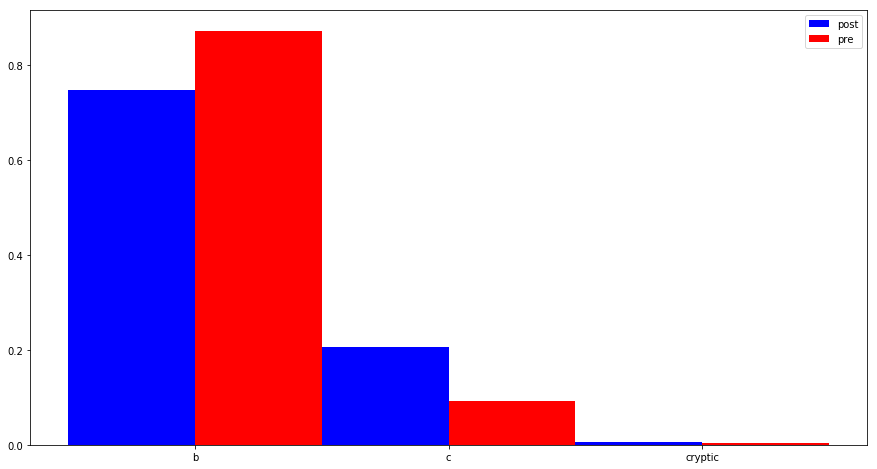

In [8]:
b6_post = pd.read_csv('b6_processed.csv')
b6_post = b6_post.rename(columns={'real_id':'id'})
b6_pre = pd.read_csv('b6_pre_processed.csv')

splice_group = pd.DataFrame(b6_post.groupby('id')['slice_type'].value_counts(normalize=True)).rename(columns = {'slice_type':'percent'}).reset_index('slice_type').reset_index('id')
splice_group_pre = pd.DataFrame(b6_pre.groupby('id')['slice_type'].value_counts(normalize=True)).rename(columns = {'slice_type':'percent'}).reset_index('slice_type').reset_index('id')

total1 = splice_group.id.nunique()
total2 = splice_group_pre.id.nunique()

f = plt.figure()
f.set_size_inches(15,8)
plt.bar([1,2,3], [float(splice_group.loc[(splice_group.slice_type == 'b')&(splice_group.percent >0.5)].id.nunique())/float(total1),
         splice_group.loc[(splice_group.slice_type == 'c')&(splice_group.percent >0.5)].id.nunique()/float(total1),
         splice_group.loc[(splice_group.slice_type == 'cryptic')&(splice_group.percent > 0.5)].id.nunique()/float(total1)],
       width = 0.5, color = 'b')

plt.bar([1.5,2.5,3.5], [splice_group_pre.loc[(splice_group_pre.slice_type == 'b')&(splice_group_pre.percent >0.5)].id.nunique()/float(total2),
         splice_group_pre.loc[(splice_group_pre.slice_type == 'c')&(splice_group_pre.percent >0.5)].id.nunique()/float(total2),
         splice_group_pre.loc[(splice_group_pre.slice_type == 'cryptic')&(splice_group_pre.percent > 0.5)].id.nunique()/float(total2)],
       width = 0.5, color = 'r')
plt.xticks([1.25,2.25,3.25],['b','c','cryptic'])
plt.legend(['post','pre'])

In [42]:
b6_pre[b6_pre.slice_type == 'b'].count()

umi           28205
id            28205
slice_type    28205
dtype: int64